In [1]:
rota = [1, 2, 5, 6]

# Converte a lista em uma tupla de tuplas de dois em dois
rota_tuplas = tuple((rota[i], rota[i+1]) for i in range(len(rota) - 1))

print(rota_tuplas)


((1, 2), (2, 5), (5, 6))


Hosts inicializados
Canais inicializados
Pares EPRs adicionados


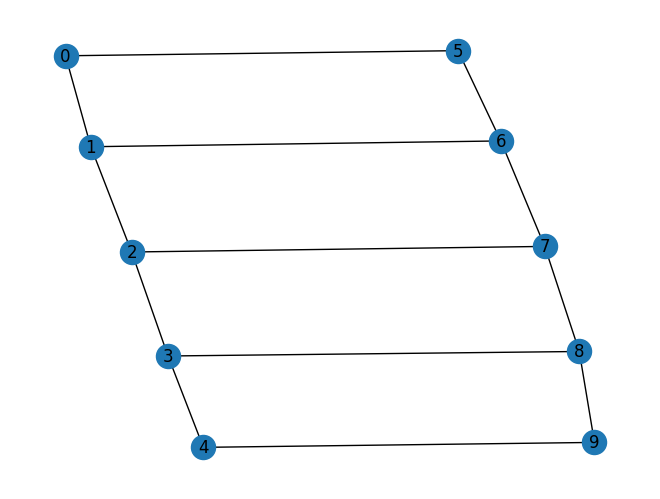

In [2]:
from quantumnet.components import Controller, Network, Host
rede = Network()
controlador = Controller(rede)
rede.set_ready_topology("Grade", 2, 5)
rede.draw()

As decisões são objetos com o método verify que retorna True ou False, dependendo da request recebida. O controlador tem um dicionário cujas chaves são os métodos verify das decisões e os valores são as ações que serão tomadas. 

In [3]:
alice_id = 0
bob_id = 8
fmin = 0.7
eprs = 3
request = [alice_id, bob_id, fmin, eprs]
actions = controlador.apply_decision(request)

Aplicando decisão do controlador para a request [0, 8, 0.7, 3]
Decisões: ['Se o destino for o mesmo que a origem']
Decisões: ['High Fidelity']
Decisões: ['Normal request E2E']
Verificando se a request é uma request normal E2E.
Request é uma request normal E2E.
Request é com certeza uma request normal E2E.
Decisão aplicada: (<quantumnet.objects.decision.normal_e2e.NormalE2E object at 0x000002B1ADF26DE0>,)


In [4]:
alice = rede.get_host(alice_id)
controlador.add_match_route_roule_in_host(request, alice)
print(alice.flow_table)

Aplicando decisão do controlador para a request [0, 8, 0.7, 3]
Decisões: ['Se o destino for o mesmo que a origem']
Decisões: ['High Fidelity']
Decisões: ['Normal request E2E']
Verificando se a request é uma request normal E2E.
Request é uma request normal E2E.
Request é com certeza uma request normal E2E.
Decisão aplicada: (<quantumnet.objects.decision.normal_e2e.NormalE2E object at 0x000002B1ADF26DE0>,)
Ações qualificadas: {1: [CreateEPR(0-5), CreateEPR(5-6), CreateEPR(6-7), CreateEPR(7-8)], 2: [Swap((0, 5)-(5, 6)), Swap((5, 6)-(6, 7)), Swap((6, 7)-(7, 8))]}
{(8, 0.7, 3): ([0, 5, 6, 7, 8], {1: [CreateEPR(0-5), CreateEPR(5-6), CreateEPR(6-7), CreateEPR(7-8)], 2: [Swap((0, 5)-(5, 6)), Swap((5, 6)-(6, 7)), Swap((6, 7)-(7, 8))]})}


In [5]:
request2 = [alice_id, 3, 0.5, 1]
alice.find_roule_by_request(request2)

False